# Beam Energy Plot

In [23]:
import hgc_testbeam as hgc
from concurrent.futures import ThreadPoolExecutor

In [24]:
executor = ThreadPoolExecutor(max_workers=32)

In [25]:
runlist = hgc.runlist.set_index("Run")

In [26]:
columns = ["event", "rechit_energy"]

In [27]:
def get_nevents_and_energy_mean_median(run):
    df = hgc.load_run(run, columns=columns)
    nevents = int(df.event.nunique())
    energy_sums = df.groupby("event").rechit_energy.sum()
    return nevents, energy_sums.mean(), energy_sums.median()

In [28]:
%%time
for run in runlist.index:
    print(run, end =" ")
    runlist.loc[run, "future"] = executor.submit(get_nevents_and_energy_mean_median, run)
print("")

384 385 386 389 390 391 392 393 397 398 399 404 405 406 407 408 411 412 414 415 416 418 419 420 421 422 423 424 425 426 429 430 431 432 433 435 436 437 439 441 442 443 444 447 450 451 452 453 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 477 479 480 481 483 484 486 487 489 490 491 493 494 495 496 501 502 503 504 505 506 507 508 509 512 513 515 516 517 518 519 520 521 522 523 524 525 527 529 530 531 532 533 534 535 536 537 538 539 541 543 544 545 546 547 548 549 550 551 552 553 554 555 557 558 559 560 561 562 563 565 566 570 572 574 577 578 579 581 582 584 586 587 588 589 590 591 592 593 594 595 596 597 599 601 603 604 606 607 608 609 610 611 613 614 616 617 618 619 620 621 622 635 636 637 639 640 641 642 643 644 645 646 647 648 649 650 652 653 654 655 656 657 659 661 663 664 665 666 667 671 672 673 674 675 676 679 680 681 682 683 685 687 688 689 690 691 692 693 694 696 697 698 699 700 701 702 704 705 708 709 710 712 713 714 715 717 718 719 721 722 

In [29]:
%%time
for run in runlist.index:
    print(run, end =" ")
    result = runlist.loc[run, "future"].result()
    runlist.loc[run, "NeventsInFile"] = result[0]
    runlist.loc[run, "RechitEnergySumMean"] = result[1]
    runlist.loc[run, "RechitEnergySumMedian"] = result[2]
print("")

384 385 386 389 390 391 392 393 397 398 399 404 405 406 407 408 411 412 414 415 416 418 419 420 421 422 423 424 425 426 429 430 431 432 433 435 436 437 439 441 442 443 444 447 450 451 452 453 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 477 479 480 481 483 484 486 487 489 490 491 493 494 495 496 501 502 503 504 505 506 507 508 509 512 513 515 516 517 518 519 520 521 522 523 524 525 527 529 530 531 532 533 534 535 536 537 538 539 541 543 544 545 546 547 548 549 550 551 552 553 554 555 557 558 559 560 561 562 563 565 566 570 572 574 577 578 579 581 582 584 586 587 588 589 590 591 592 593 594 595 596 597 599 601 603 604 606 607 608 609 610 611 613 614 616 617 618 619 620 621 622 635 636 637 639 640 641 642 643 644 645 646 647 648 649 650 652 653 654 655 656 657 659 661 663 664 665 666 667 671 672 673 674 675 676 679 680 681 682 683 685 687 688 689 690 691 692 693 694 696 697 698 699 700 701 702 704 705 708 709 710 712 713 714 715 717 718 719 721 722 

In [30]:
runlist = runlist.drop("future", axis=1)

In [31]:
runlist.to_csv("runlist_augmented.csv")

In [33]:
import matplotlib.pyplot as plt

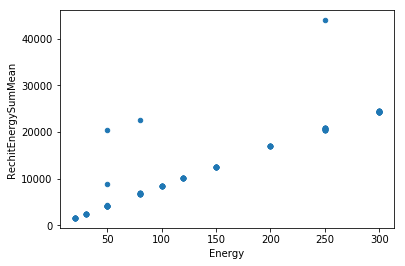

In [36]:
runlist.query("Particle == 'electron' and CaloConfiguration == 1").plot.scatter(x="Energy", y="RechitEnergySumMean")

In [15]:
runlist.query("Particle == 'electron' and CaloConfiguration == 1 and Factor > 150")

,Date,Nevents,Particle,Energy,Configuration,CaloConfiguration,NeventsInFile,RechitEnergySum,MeanRechitEnergySum,Factor
Run,,,,,,,,,,
